In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('avocado.csv')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.shape

(18249, 14)

In [5]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is not any null value in this dataset

In [9]:
data.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [10]:
print(data['year'].unique())

[2015 2016 2017 2018]


this dataset contain data from 2015 to 2018

In [11]:
print(data['type'].unique())

['conventional' 'organic']


<AxesSubplot:xlabel='type', ylabel='count'>

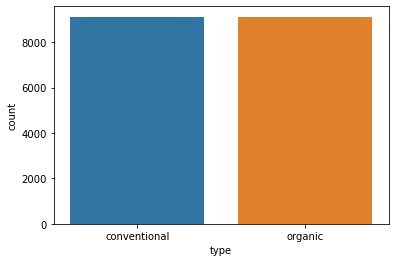

In [12]:
sns.countplot(data['type'])

There are two types of Avocado, conventional and Organic, both have nearly similar number of data in this dataset

<AxesSubplot:xlabel='AveragePrice'>

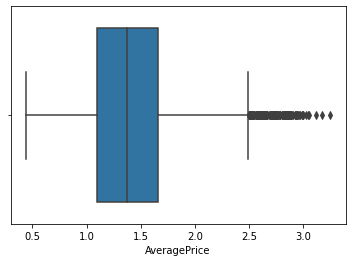

In [13]:
sns.boxplot(data['AveragePrice'])

There is some data out of the maximum range, means there is outliers in AveragePrice

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

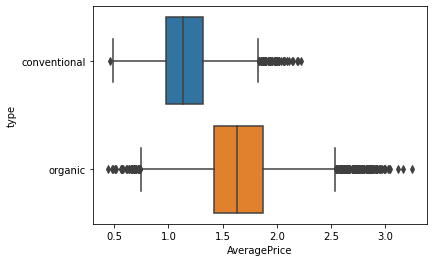

In [14]:
sns.boxplot(y="type", x="AveragePrice", data=data)

Average price of Organic Avocado is higher than the conventional Avocado

In [15]:
outliers = (data['AveragePrice'] > 2.5) | (data['AveragePrice'] < 0.26)
data[outliers].count()

Unnamed: 0      203
Date            203
AveragePrice    203
Total Volume    203
4046            203
4225            203
4770            203
Total Bags      203
Small Bags      203
Large Bags      203
XLarge Bags     203
type            203
year            203
region          203
dtype: int64

203 in 18249, which means ~0.01 of the data consist of outliers.

In [16]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(data.type.drop_duplicates()) 
dicts['type'] = list(label.classes_)
data.type = label.transform(data.type) 

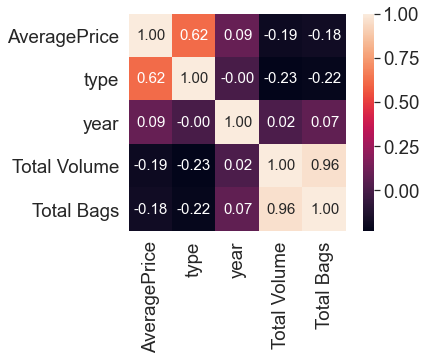

In [17]:
cols = ['AveragePrice','type','year','Total Volume','Total Bags']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.7)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

In [18]:
x = data.drop(['Unnamed: 0','type','region','Date'], axis = 1)
y = data.type

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [19]:
def models(x_train,y_train):
    #use logistic regression
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)
    
   
    print('[0]Logistic Regression training Accuracy:   ' , log.score(x_train,y_train))
 
    return log

In [20]:
model=models(x_train,y_train)

[0]Logistic Regression training Accuracy:    0.9331454516987631


In [21]:
def models(x_train,y_train):
   
    #use KNeighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
    knn.fit(x_train,y_train)
    
    print('KNeighbors training Accuracy: ' , knn.score(x_train,y_train))
    
    return knn

In [22]:
model=models(x_train,y_train)

KNeighbors training Accuracy:  0.9823860967590418


In [23]:
def models(x_train,y_train):
    #use decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)
    print('DecisionTreeClassifier training Accuracy:' , tree.score(x_train,y_train))
    return tree

In [24]:
model=models(x_train,y_train)

DecisionTreeClassifier training Accuracy: 1.0


accuracy of decision trre classifier is 100%